# Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv(r"C:\Users\HARRY\Downloads\Fraud_check (2).csv")

In [4]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [11]:
# Dealing with categorical of independent
df=pd.get_dummies(df,columns=["Undergrad","Marital.Status","Urban"],drop_first=True)

In [12]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [13]:
df["Taxable.Income"]=df["Taxable.Income"].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [17]:
df["Taxable.Income"].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

# Train Test Split

In [19]:
x=df.drop(columns=["Taxable.Income"])
y=df["Taxable.Income"]

In [20]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=42)

# Model building

In [21]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [22]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7333333333333333

In [23]:
cv=KFold(n_splits=10)
modelll=RandomForestClassifier(n_estimators=100,random_state=42)
scores=cross_val_score(modelll,x_train,y_train,cv=cv)

In [24]:
scores

array([0.75      , 0.66666667, 0.77083333, 0.6875    , 0.75      ,
       0.8125    , 0.77083333, 0.72916667, 0.79166667, 0.77083333])

In [26]:
scores.mean()

0.75

# Hyperparamter Tuning

In [27]:
n_estimators = list(range(1,200))
criterion=["gini", "entropy", "log_loss"]

parameters = {"n_estimators" : n_estimators, "criterion" : criterion}

model = RandomForestClassifier()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(x_train, y_train)

C:\Users\HARRY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
995 fits failed out of a total of 2985.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
995 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HARRY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HARRY\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\HARRY\anaconda3\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\HARRY\anaconda3\lib\site-package

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [28]:
print(grid.best_score_)
print(grid.best_params_)


0.7625
{'criterion': 'gini', 'n_estimators': 4}


In [29]:
model = RandomForestClassifier(criterion= 'gini', n_estimators=4, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=4, random_state=0)

In [30]:
feature_scores = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

City.Population           0.575557
Work.Experience           0.338573
Undergrad_YES             0.029038
Urban_YES                 0.027076
Marital.Status_Single     0.016958
Marital.Status_Married    0.012797
dtype: float64

# Visualize feature scores of the features

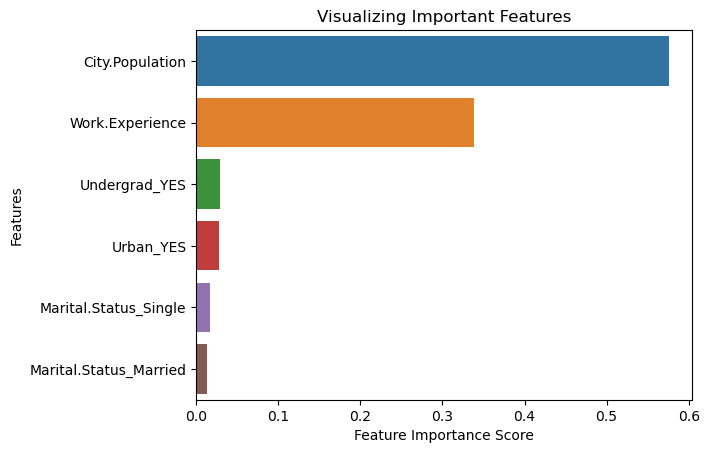

In [31]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [32]:
y_pred=model.predict(x_test)
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n        Good       0.77      0.95      0.85        94\n       Risky       0.00      0.00      0.00        26\n\n    accuracy                           0.74       120\n   macro avg       0.39      0.47      0.43       120\nweighted avg       0.61      0.74      0.67       120\n'